## Alla muutamat asennukset, joita tarvitsemme



### Vain toinen riittää
- (CUDA-tuettu näyttis) **pip install pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121**
    - (Pelkkä  CPU) **pip3 install torch torchvision torchaudio**
### Kaikki nämä
- pip install notebook
- pip install numpy
- pip install matplotlib.pyplot
- pip install opencv-python
---
### Tarkista asennukset ajamalla alla oleva komento
- pip list
---
### COCO = Common Objects in Context dataset labels
Alapuolella olevasta linkin löytyy projektin käytössä olevat labelit

https://tech.amikelive.com/node-718/what-object-categories-labels-are-in-coco-dataset/

In [2]:
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_mobilenet_v3_large_320_fpn
from torchvision.transforms import functional as F
from torchvision.transforms import v2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

c:\Users\Juuso\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\datapoints\__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
c:\Users\Juuso\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\transforms\v2\__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedba

# Transformin käyttö Pytorchissa

1. Valitaan käytettäv kuva ja avataan se käyttämällä Image.open()
2. Valitaan käytettävät transform-toiminnot ja muodostetaan niistä kokonaisuus käyttämällä v2.Compose
3. Transformin asettaminen haluttuun kuvaan/kuviin
4. Kuvien tarkasteleminen 

(-0.5, 1499.5, 1999.5, -0.5)

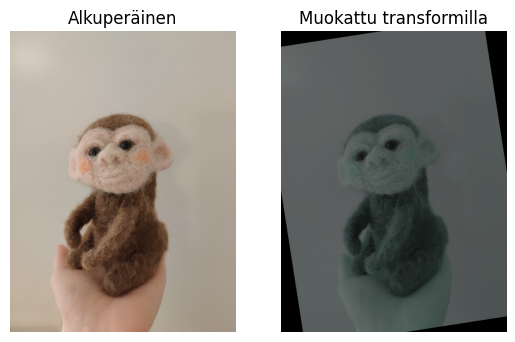

In [15]:
# Kuvan lataaminen
ourImage = Image.open('images/apina.jpg')

# Transformin määritys
transforms = v2.Compose([
    v2.ColorJitter((0.5, 2), (0.5, 1), (0.5, 0.5), (-0.5, 0.5)),
    v2.RandomHorizontalFlip(p=0.5),
    v2.RandomVerticalFlip(p=0.1),
    v2.RandomRotation(degrees=(0, 10)),
    v2.RandomAdjustSharpness(sharpness_factor=2)
])

# Transformin asettaminen uuteen muuttujaan
transformed_image = transforms(ourImage)

# Kuva 1 asettaminen ensimmäiseen sarakkeeseen (rivit, sarakkeet, indeksi)
plt.subplot(1, 2, 1)
plt.imshow(ourImage)
plt.title('Alkuperäinen')
plt.axis('off')

# Kuva 2 asettaminen toiseen sarakkeeseen rivit, sarakkeet, indeksi
plt.subplot(1, 2, 2)
plt.imshow(transformed_image)
plt.title('Muokattu transformilla')
plt.axis('off')

# Kuvantunnistuksen toteutus esiopetetulla mallilla
## Koodin toiminta
1. Vaihda tiedostopolku
2. Tarkista labelin numero "coco-labels-2014_2017.txt" tiedostosta.
3. Muista vaihtaa labelin numero for-loopin sisälle
4. Testaile


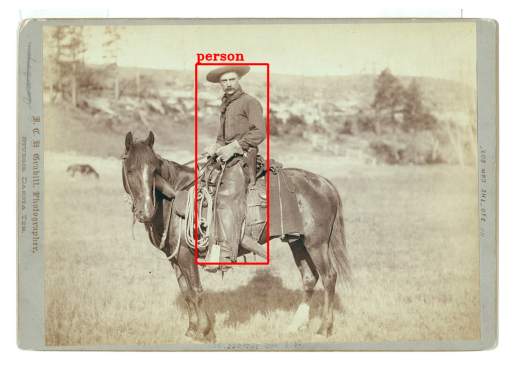

In [18]:

# Esiopetetun tunnistuksen käyttäminen
model = fasterrcnn_mobilenet_v3_large_320_fpn(pretrained=True)
model.eval()

# Kuvien merkitsemis labeleiden sijainti
with open('labels/coco-labels-2014_2017.txt') as pic:
    class_labels = pic.read().splitlines()

def draw_targetAndBox(image_path):
    image = Image.open(image_path)
    image = np.array(image)

    # Poista gradienttilaskenta käytöstä.
    with torch.no_grad():
        prediction = model([F.to_tensor(image)])

    # Kuvan muuttaminen RGB -> BGR (OpenCV standardi)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    for box, label in zip(prediction[0]['boxes'], prediction[0]['labels']):
        ## Vaihda tähän labelin numero, jota yrität tunnistaa
        if label == 1:
            box = [int(b) for b in box]
            label_text = f'{class_labels[label]}'
            # Neliön piirtäminen tunnistettavan kohteen ympärille
            cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]), (0, 0, 255), 3)
            # Tunnistettavan kohteen labelin määritys (fontti, koko, väri)
            cv2.putText(image, label_text, (box[0], box[1] - 10), cv2.FONT_HERSHEY_TRIPLEX, 1.0, (0, 0, 255), 2)

    # Kuvan muuttaminen BGR -> RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Vaihda kuvan polku tähän. Käytä vain polun loppuosaa kuvan valitsemiseen
ourImage = 'images/cowboy2.jpg'

draw_targetAndBox(ourImage)
